# HW4 logistic_regression（逻辑回归作业练习）

## <font color=brown> 本次作业包括两个练习</font>
## 练习1: 使用逻辑回归模型来对学生是否能被大学录取进行预测。
## 已知数据集中包含两次测试成绩exam1 和 exam2，以及是否被录取的标记 admitted。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report #这个包是评价报告
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# 1.1 准备数据

In [3]:
print("171250628 宋定杰")  #  双引号内替换成你的学号和姓名
data = pd.read_csv('hw4data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()#看前五行

171250628 宋定杰


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()
# count表示data数量
# 

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


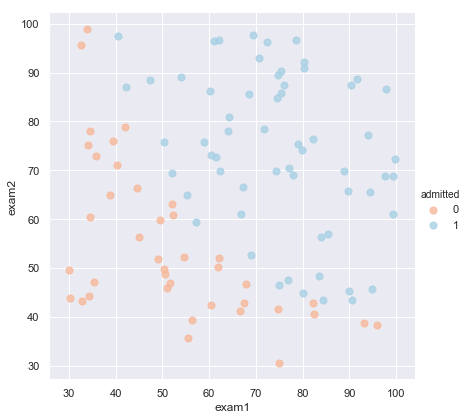

In [5]:
# 关于 SeaBorn 画图，可参考：https://www.jianshu.com/p/5ff47c7d0cc9

sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2),color_codes=False)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           height=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )
plt.show()#看下数据的样子

In [6]:
def get_X(df):#读取特征
#     """
#     use concat to add intersect feature to avoid side effect
#     not efficient for big dataset though
#     """
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # ones是m行1列的dataframe
    data = pd.concat([ones, df], axis=1)            # 合并数据，根据列合并
    return data.iloc[:, :-1].as_matrix()            # 这个操作返回 ndarray,不是矩阵


def get_y(df):#读取标签
#     '''assume the last column is the target'''
    return np.array(df.iloc[:, -1])                # df.iloc[:, -1]是指df的最后一列


def normalize_feature(df):
#     """Applies function along input axis(default 0) of DataFrame."""
    return df.apply(lambda column: (column - column.mean()) / column.std())  # 特征缩放

In [7]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


# 1.2 sigmoid 函数
g 代表一个常用的逻辑函数（logistic function）为S形函数（Sigmoid function），公式为： \\[g\left( z \right)=\frac{1}{1+{{e}^{-z}}}\\] 
合起来，我们得到逻辑回归模型的假设函数： 
	\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 


In [8]:
## 实现sigmoid 函数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))                               ## 补充YOUR_CODE处的代码

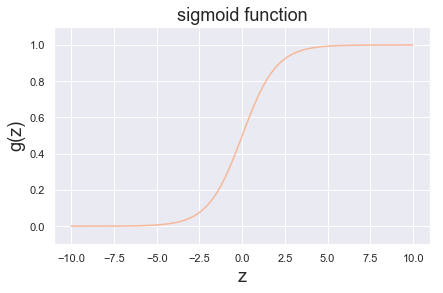

In [9]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(np.arange(-10, 10, step=0.01),
        sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

# 1.3 cost function(代价函数)
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

$$\begin{align}
  & J\left( \theta  \right)=-\frac{1}{m}\sum\limits_{i=1}^{m}{[{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)+\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
 & =\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]} \\ 
\end{align}$$


In [10]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([0., 0., 0.])

In [11]:
## 实现代价函数 cost
def cost(theta, X, y):
    thetaX = np.dot(X,theta.T)
    in1 = np.dot(-y, np.log(sigmoid(thetaX)))
    in2 = np.dot(1-y, np.log(1 - sigmoid(thetaX)))
    inner = in1 - in2
    return np.sum(inner) / len(X)                               ## 补充YOUR_CODE处的代码

# X @ theta与X.dot(theta)等价

In [12]:
cost(theta, X, y)

0.6931471805599452

# 1.4 gradient 函数(梯度函数)
* 梯度计算$\frac{1}{m} X^T( Sigmoid(X\theta) - y )$
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

In [24]:
## 实现梯度计算函数 gradient
def gradient(theta, X, y):
#     temp = np.matrix(np.zeros(theta.shape))
#     para = int(theta.ravel().shape[0])
#     print(temp,para)
    
#     h = sigmoid(np.dot(X, theta.T))
#     error = h - y
#     for j in range(para):
#         term = np.multiply(error,X[:,j])
#         temp[j] = theta[j] - (np.sum(term) / len(X))
#     theta = temp
    inner = np.dot(X.T, sigmoid(np.dot(X, theta.T))-y)
    return inner / len(X)                       ## 补充YOUR_CODE处的代码


In [25]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

# 1.5 拟合参数
* <font color=Brow>这里我们不使用梯度下降法，改用 [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) 去计算参数</font>  


In [15]:
import scipy.optimize as opt

In [16]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [17]:
print(res)

     fun: 0.2034977015894895
     jac: array([-4.33738420e-07, -2.47262193e-05, -2.84907400e-05])
 message: 'Optimization terminated successfully.'
    nfev: 72
    nhev: 0
     nit: 29
    njev: 256
  status: 0
 success: True
       x: array([-25.16135181,   0.20623186,   0.20147175])


# 1.6 用训练集预测和验证

In [18]:
## 回忆课堂内容，此处的概率如何计算
def predict(x, theta):
    prob = sigmoid(np.dot(x,theta.T))                               ## 补充YOUR_CODE处的代码
    return (prob >= 0.5).astype(int)

In [19]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))
## 此处的classification_report函数将根据真值y与预测值y_pred，输出分析报告

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



# 1.7 寻找决策边界

* $\theta^T x = 0$ (一个样本$x$)
* $X \theta = 0$ (所有训练样本$X$)

In [27]:
print(res.x) # this is final theta
res.x[2]

[-25.16135181   0.20623186   0.20147175]


0.2014717480030193

In [84]:
#YOUR_CODE begin
#此处补充4~5行代码，计算x和y的值，用于绘制决策边界
# x = np.sum(X[:,1]) / len(X[:,1])
# y = np.sum(X[:,2]) / len(X[:,2])
# print(x,y)

# x = np.array([np.sum(X[:,0]) / len(X[:,0]), np.sum(X[:,1]) / len(X[:,1]),np.sum(X[:,2]) / len(X[:,2])])
# y = np.dot(x,res.x)
# x = np.sum(X[:,2]) / len(X[:,2])

x = X[:,2]
# y = (-1 / res.x[1]) * (res.x[0] * np.sum(X[:,0]) / len(X[:,0])  +  res.x[2] * x)
y = (-1 / res.x[1]) * (res.x[0] * X[:,0]  +  res.x[2] * x)

#YOUR_CODE end

In [85]:
data.describe()  # find the range of x and y

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


F:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


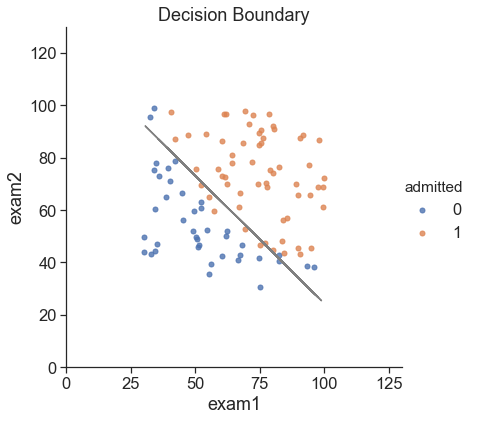

In [86]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')
plt.show()

# 2 正则化逻辑回归
## 练习2: 使用正则化逻辑回归模型来对芯片是否能通过质检进行预测。
## 已知数据集中包含两次检测成绩test1 和 test2，以及是否通过质检的标记 accepted。
# 2.1 准备数据

In [87]:
df = pd.read_csv('hw4data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


F:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


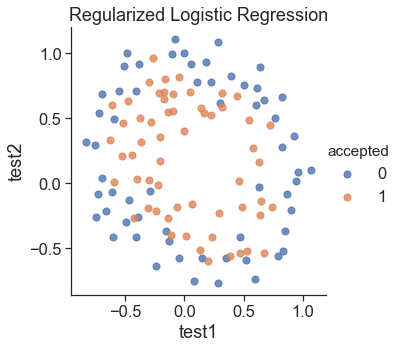

In [88]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=5, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')
plt.show()

# 2.2 feature mapping（特征映射）

* 我们进行多项式扩展来构造特征
polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="mapped_feature.png">

In [89]:
def feature_mapping(x, y, power, as_ndarray=False):
    #     """return mapped features as ndarray or dataframe"""
    # data = {}
    # # inclusive
    # for i in np.arange(power + 1):
    #     for p in np.arange(i + 1):
    #         data["f{}{}".format(i - p, p)] = np.power(x, i - p) * np.power(y, p)

    data = {"f{}{}".format(i - p, p): np.power(x, i - p) * np.power(y, p)
                for i in np.arange(power + 1)
                for p in np.arange(i + 1)
            }

    if as_ndarray:
        return pd.DataFrame(data).as_matrix()
    else:
        return pd.DataFrame(data)


In [90]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [91]:
data = feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [92]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


# 2.3 regularized cost（正则化代价函数）
$$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$$

In [93]:
theta = np.zeros(data.shape[1])
X = feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = get_y(df)
print(y.shape)

(118, 28)
(118,)


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [94]:
## 实现正则化代价函数
def regularized_cost(theta, X, y, lambd=1):
#YOUR_CODE begin
    #此处补充3～4行代码，用于实现正则化代价函数
    print( (lambd / 2*len(X)) * np.dot(theta.T, theta))
    return cost(theta,X,y) + (lambd / 2*len(X)) * np.dot(theta.T, theta)
    #YOUR_CODE end
#正则化代价函数

In [95]:
regularized_cost(theta, X, y, lambd=1)

0.0


0.6931471805599453

# 2.4 regularized gradient(正则化梯度)
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\left( \frac{1}{m}\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}\left( {{x}^{\left( i \right)}} \right)-{{y}^{\left( i \right)}} \right)} \right)+\frac{\lambda }{m}{{\theta }_{j}}\text{ }\text{             for  j}\ge \text{1}$$

In [96]:
## 实现正则化梯度函数
def regularized_gradient(theta, X, y, lambd=1):
#YOUR_CODE begin
    #此处补充4~5行代码，用于实现正则化梯度函数
    return gradient(theta, X, y) + (lambd / len(X)) * theta
    
#YOUR_CODE end

In [97]:
regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# 2.5 拟合参数

In [98]:
import scipy.optimize as opt

In [99]:
print('init cost = {}'.format(regularized_cost(theta, X, y)))

# 此处我们直接使用scipy中的optimize库来进行参数计算
res = opt.minimize(fun=regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=regularized_gradient)
res

0.0
init cost = 0.6931471805599453
0.0
267.5924701560007
4.482005862672005e-06
116.5788232015462
1.7919890844698484e-05
50.80225051394833
4.029156698075732e-05
22.149769907206302
7.155131076085308e-05
4.5055515235263886e-05
4.123910241190289e-05
4.0489359423400925e-05
4.03332662876891e-05
4.030037650146488e-05
4.0322082255157314e-05
4.030496266466573e-05
4.0316261186541685e-05
4.030735005212475e-05
4.031323129033119e-05
4.030859280252285e-05
4.0307612670967676e-05
4.030740554965665e-05
4.030736178006592e-05
4.030735253049813e-05
4.030735057583461e-05
4.0307350162765624e-05
4.030735007547392e-05
4.0307350057027174e-05
4.030735005312974e-05
4.030735005570205e-05
4.0307350053643216e-05
4.0307350053213906e-05
4.03073500531363e-05
4.030735005314204e-05
4.0307350053177965e-05
4.030735005314357e-05
4.030735005314499e-05
4.030735005316147e-05
4.030735005316184e-05
4.030735005316218e-05
4.0307350053170084e-05
4.030735005317529e-05
4.030735005317011e-05
4.0307350053170145e-05
4.030735005317271e-

     fun: 0.6931471805599453
     jac: array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])
 message: 'Warning: Desired error not necessarily achieved due to precision loss.'
    nfev: 61
    nhev: 0
     nit: 0
    njev: 54
  status: 2
 success: False
       x: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# 2.6 预测

In [100]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.49      1.00      0.66        58

   micro avg       0.49      0.49      0.49       118
   macro avg       0.25      0.50      0.33       118
weighted avg       0.24      0.49      0.32       118



F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
F:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# 2.7 使用不同的 $\lambda$ 对于预测结果的影响
* 尝试不同的lambda(0.1,10)对于上述2.6节预测结果的影响，将结果反映在作业报告中

# 2.8 画出决策边界
* 我们找到所有满足 $X \theta = 0$ 的$x$
* 以下内容不需要完善代码，仅供同学们参考

In [101]:
def draw_boundary(power, lambd):
#     """
#     power: polynomial power for mapped feature
#     lambd: lambda constant
#     """
    density = 1000
    threshhold = 2 * 10**-3

    final_theta = feature_mapped_logistic_regression(power, lambd)
    x, y = find_decision_boundary(density, power, final_theta, threshhold)

    df = pd.read_csv('hw4data2.txt', names=['test1', 'test2', 'accepted'])
    sns.lmplot('test1', 'test2', hue='accepted', data=df, size=5, fit_reg=False, scatter_kws={"s": 100})

    plt.scatter(x, y, c='R', s=10)
    plt.title('Decision boundary')
    plt.show()

In [102]:
def feature_mapped_logistic_regression(power, lambd):
#     """for drawing purpose only.. not a well generealize logistic regression
#     power: int
#         raise x1, x2 to polynomial power
#     lambd: int
#         lambda constant for regularization term
#     """
    df = pd.read_csv('hw4data2.txt', names=['test1', 'test2', 'accepted'])
    x1 = np.array(df.test1)
    x2 = np.array(df.test2)
    y = get_y(df)

    X = feature_mapping(x1, x2, power, as_ndarray=True)
    theta = np.zeros(X.shape[1])

    res = opt.minimize(fun=regularized_cost,
                       x0=theta,
                       args=(X, y, lambd),
                       method='TNC',
                       jac=regularized_gradient)
    final_theta = res.x

    return final_theta

In [103]:
def find_decision_boundary(density, power, theta, threshhold):
    t1 = np.linspace(-1, 1.5, density)
    t2 = np.linspace(-1, 1.5, density)

    cordinates = [(x, y) for x in t1 for y in t2]
    x_cord, y_cord = zip(*cordinates)
    mapped_cord = feature_mapping(x_cord, y_cord, power)  # this is a dataframe

    inner_product = mapped_cord.as_matrix() @ theta

    decision = mapped_cord[np.abs(inner_product) < threshhold]

    return decision.f10, decision.f01
#寻找决策边界函数

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


0.0
1.6769663921817636e-16
3.2864682361436085e-16
6.861636570544407e-17
4.124802976125301e-18
692.072018351846
173.0180045879615
43.25450114699038
10.813625286747595
2.7034063216868987
0.6758515804217247
0.16896289510543117
0.04224072377635779
0.010560180944089448
0.002640045236022362
0.0006600113090055905
0.00016500282725139762
4.1250706812849406e-05
9.281409032891116e-05
6.445422939507721e-05
5.220792581001253e-05
4.656818073794328e-05
4.386915988202442e-05
4.254986237409393e-05
4.1897766850135925e-05
4.1573607395658736e-05
4.141199974529559e-05
4.133131393933288e-05
4.129100054115624e-05
4.12708512182691e-05
4.126077840087583e-05
4.125574245319176e-05
4.125322459460287e-05
4.125196569412171e-05
4.125133625108445e-05
4.125102153136666e-05
4.1250864171957964e-05
4.125078549236617e-05
4.1250746152598414e-05
4.125072648272156e-05
4.1250716647784904e-05
4.125071173031701e-05
4.125070927158318e-05
4.125070804221628e-05
4.125070742753285e-05
4.125575403100721e-05
4.125071004929365e-05
701.

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
F:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


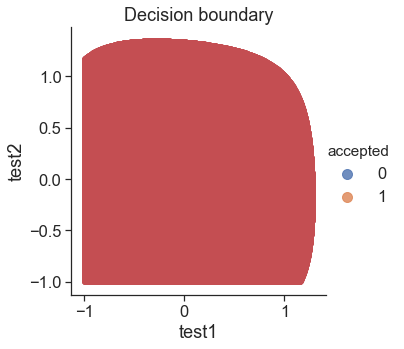

In [104]:
draw_boundary(power=6, lambd=1)#lambda=1

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
F:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


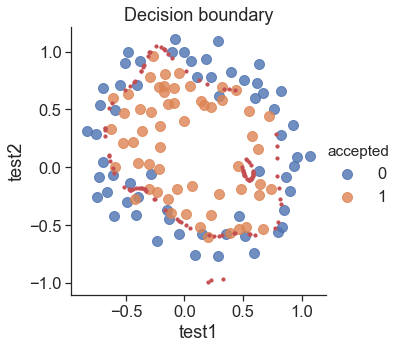

In [105]:
draw_boundary(power=6, lambd=0)  # no regularization, over fitting，#lambda=0,没有正则化，过拟合了

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


0.0
1.6769663921817635e-14
3.7947516066620205e-16
82.23229445147054
20.558073612867634
5.139518403216909
1.2848796008042271
0.3212199002010568
0.0803049750502642
0.02007624376256605
0.005019060940641512
0.001254765235160378
0.0003136913087900945
7.842282719752363e-05
1.9605706799380907e-05
4.901426699845227e-06
1.2253566749613067e-06
2.7570525186629402e-06
1.9146198046270417e-06
1.5508420417479038e-06
1.3833128088430375e-06
1.3031381045242802e-06
1.2639482303983205e-06
1.2445776628436952e-06
1.2349484714434715e-06
1.2301478988376317e-06
1.22775111830828e-06
1.2265536044869962e-06
1.2259550666872021e-06
1.225655852565017e-06
1.2255062591983524e-06
1.2254314659386273e-06
1.2253940701646664e-06
1.2253753724916615e-06
1.2253660237086526e-06
1.225361349330522e-06
1.2253590121448e-06
1.2253578435527748e-06
1.2253572592569712e-06
1.2256558443782302e-06
1.225356682686719e-06
82.256214088988
20.569073461826584
5.144778794755193
1.2874503728468245
0.3224908897994723
0.08093733025250431
0.0203920

F:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
F:\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


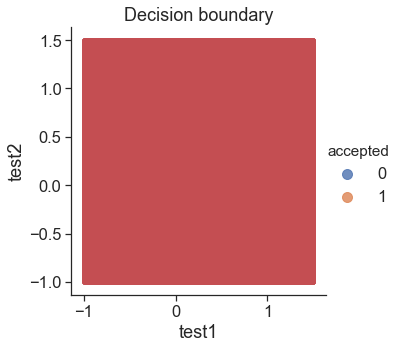

In [106]:
draw_boundary(power=6, lambd=100)  # underfitting，#lambda=100,欠拟合